In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
concrete = pd.read_csv('concrete.csv')
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [9]:
x_data = concrete.iloc[:,:-1]
y_data = concrete.iloc[:,-1:]

x_data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270


In [10]:
y_data

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29
...,...
1025,13.29
1026,41.30
1027,44.28
1028,55.06


In [65]:
X = tf.placeholder(tf.float32, shape=[None,8])
Y = tf.placeholder(tf.float32, shape=[None,1])

W1 = tf.Variable(tf.random_normal([8,10]), name='weight')
b1 = tf.Variable(tf.random_normal([10]), name = 'bias')
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,7]), name='weight')
b2 = tf.Variable(tf.random_normal([7]), name = 'bias')
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)


W3 = tf.Variable(tf.random_normal([7,1]), name='weight')
b3 = tf.Variable(tf.random_normal([1]), name = 'bias')



hypothesis = tf.matmul(layer2, W3) + b3

cost = tf.reduce_mean(tf.square(Y - hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(200001):
        c, h, _ = sess.run([cost, hypothesis, train], feed_dict={X:minmax, Y:y_data})
        if (step % 10000 == 0):
            print(step, c,'\n', h)
    print(c,h)

0 1449.7163 
 [[1.7568843]
 [1.8135991]
 [1.7925718]
 ...
 [1.6077396]
 [1.5598885]
 [1.2698069]]
10000 32.370865 
 [[26.239645]
 [21.310656]
 [29.931078]
 ...
 [44.726597]
 [45.33284 ]
 [44.564384]]
20000 26.346914 
 [[25.82126 ]
 [22.060028]
 [31.474834]
 ...
 [44.90827 ]
 [48.388504]
 [46.414795]]
30000 23.206747 
 [[26.995934]
 [22.640514]
 [32.024166]
 ...
 [45.092884]
 [49.478157]
 [49.19476 ]]
40000 21.15888 
 [[27.931301]
 [22.901255]
 [32.323204]
 ...
 [45.6494  ]
 [51.507965]
 [49.124702]]
50000 19.906736 
 [[28.146646]
 [22.462812]
 [32.566803]
 ...
 [45.06296 ]
 [52.05355 ]
 [49.098347]]
60000 18.582497 
 [[28.179146]
 [22.86061 ]
 [32.726933]
 ...
 [44.70643 ]
 [52.58493 ]
 [49.756145]]
70000 17.263456 
 [[28.20307 ]
 [23.660614]
 [33.103603]
 ...
 [45.242702]
 [52.981804]
 [51.47709 ]]
80000 16.695864 
 [[28.153467]
 [24.010647]
 [33.345848]
 ...
 [45.404587]
 [53.042866]
 [52.405834]]
90000 16.496466 
 [[28.191423]
 [23.97363 ]
 [33.458477]
 ...
 [45.29011 ]
 [53.040073]

In [61]:
minmax = ((x_data - x_data.min(axis=0))/(x_data.max(axis=0)-x_data.min(axis=0)+1e-10))

In [62]:
minmax

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176
...,...,...,...,...,...,...,...,...
1025,0.075342,0.000000,0.829585,0.464856,0.310559,0.465116,0.529353,0.074176
1026,0.980137,0.000000,0.000000,0.159744,0.875776,0.148547,0.751882,0.005495
1027,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176
1028,0.547945,0.105732,0.000000,0.848243,0.000000,0.380814,0.190667,0.739011


In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [5]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(array([7], dtype=int64),)


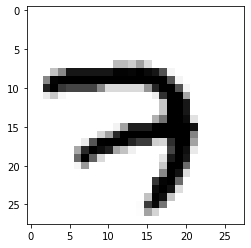

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(array([3], dtype=int64),)


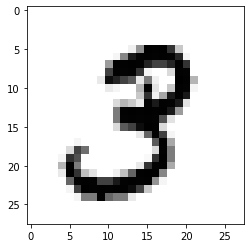

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(array([4], dtype=int64),)


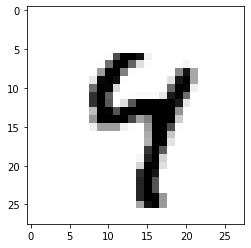

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(array([6], dtype=int64),)


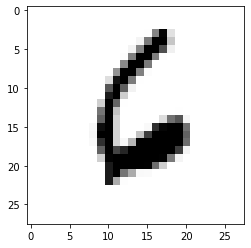

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(array([1], dtype=int64),)


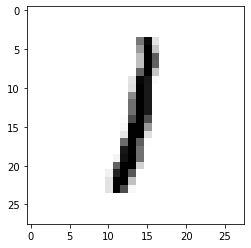

In [6]:
import matplotlib.pyplot as plt


for i in range(5):
    print(mnist.train.labels[i])
    print(np.where(mnist.train.labels[i]==1))
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap = 'Greys')
    plt.show()

In [7]:
x_data = mnist.train.images

In [8]:
y_data = mnist.train.labels

In [10]:
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])

W1 = tf.Variable(tf.random_normal([784,100]), name = 'weight')
b1 = tf.Variable(tf.random_normal([100]), name = 'bias')
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([100,50]), name = 'weight')
b2 = tf.Variable(tf.random_normal([50]), name = 'bias')
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)


W3 = tf.Variable(tf.random_normal([50,10]), name='weight')
b3 = tf.Variable(tf.random_normal([10]), name='bias')
logits = tf.matmul(layer2,W3)+b3

hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = y_data)

cost = tf.reduce_mean(cost_i)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

prediction = tf.argmax(hypothesis,1)
cor_pre = tf.equal(prediction, tf.argmax(y_data,1))
accuracy = tf.reduce_mean(tf.cast(cor_pre,tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(optimizer, feed_dict = {X:x_data, Y:y_data})
        if step % 1000 == 0:
            c,a = sess.run([cost,accuracy], feed_dict={X:x_data, Y:y_data})
            print(step, a, c)
            
        

0 0.0832 7.147949
1000 0.35369092 2.0469375
2000 0.4766 1.5906241
3000 0.54892725 1.3586029
4000 0.59801817 1.2086972
5000 0.63543636 1.1013027
6000 0.6648727 1.0192313
7000 0.6878 0.95370346
8000 0.7070364 0.8998097
9000 0.7224182 0.85457015
10000 0.73572725 0.8159956


In [14]:
len(x_data)

55000

In [15]:
len(x_data[0])

784

In [66]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100 

X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])

W1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))


hypothesis = tf.matmul(L2,W3)+b3
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,
                                                             labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch=int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch
        print('Epoch :',epoch+1,'  cost :',avg_cost)
    print('finish')
    
    correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy of Train data: {}".format(sess.run(accuracy, feed_dict={X:mnist.train.images,
                                                                           Y:mnist.train.labels})))
    print("Accuracy of Test data: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                                          Y:mnist.test.labels})))
    
    print("Accuracy of My data: {}".format(sess.run(accuracy, feed_dict={X:mytest,Y:[[0,0,0,0,0,0,1,0,0,0],
                                                                                     [0,0,0,0,1,0,0,0,0,0]]})))

Epoch : 1   cost : 157.38431616696454
Epoch : 2   cost : 42.70341306751424
Epoch : 3   cost : 26.701611048199926
Epoch : 4   cost : 18.33611378718
Epoch : 5   cost : 14.072718633467494
Epoch : 6   cost : 9.905933107166339
Epoch : 7   cost : 7.708273291909218
Epoch : 8   cost : 5.827570587674476
Epoch : 9   cost : 4.296279420987335
Epoch : 10   cost : 3.3229062405875167
Epoch : 11   cost : 2.5171585508683463
Epoch : 12   cost : 1.8608905353525722
Epoch : 13   cost : 1.4274658135043667
Epoch : 14   cost : 1.125322891341966
Epoch : 15   cost : 0.8713579852776293
Epoch : 16   cost : 0.7970355308180901
Epoch : 17   cost : 0.7097852203019576
Epoch : 18   cost : 0.51544866440284
Epoch : 19   cost : 0.5280551661173333
Epoch : 20   cost : 0.41342972738947037
finish
Accuracy of Train data: 0.991418182849884
Accuracy of Test data: 0.9473999738693237
Accuracy of My data: 0.0


In [55]:
from PIL import Image
im1 = Image.open("my_four.png")
im2 = Image.open("my_six.png")

In [56]:
pixel = np.array(im1)

mytestimg1 = 1-pixel[:,:,0]/255

mytestimg1 = mytestimg1.reshape(1,784)

mytestimg1.shape

(1, 784)

In [57]:
pixel = np.array(im2)

mytestimg2 = 1-pixel[:,:,0]/255

mytestimg2 = mytestimg2.reshape(1,784)

mytestimg2.shape

(1, 784)

In [64]:
mytest = np.append(mytestimg1,mytestimg2,axis=0)

In [65]:
mytest.shape

(2, 784)